# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

# Scratch

Please ignore this section

In [33]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
categories

['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

In [34]:
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

## whats in train?

In [48]:
print(type(newsgroups_train))

<class 'sklearn.utils.Bunch'>


In [22]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [24]:
type(newsgroups_train.data)

list

In [25]:
type(newsgroups_train.filenames)

numpy.ndarray

In [26]:
type(newsgroups_train.target_names)

list

In [27]:
type(newsgroups_train.target)

numpy.ndarray

In [28]:
type(newsgroups_train.DESCR)

str

In [35]:
len(newsgroups_train.data)

2034

In [38]:
len(newsgroups_train.filenames)

2034

In [39]:
len(newsgroups_train.target_names)

4

In [40]:
len(newsgroups_train.target)

2034

In [30]:
newsgroups_train.data[0]

"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych"

In [43]:
newsgroups_train.filenames[0]

'C:\\Users\\yangyq\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38816'

In [44]:
newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [46]:
newsgroups_train.target[0:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

## whats in test?

In [47]:
print(type(newsgroups_test))

<class 'sklearn.utils.Bunch'>


In [49]:
newsgroups_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [55]:
len(newsgroups_test.data)

1353

In [52]:
len(newsgroups_test.filenames)

1353

In [53]:
len(newsgroups_test.target_names)

4

In [54]:
len(newsgroups_test.target)

1353

In [58]:
newsgroups_test.data[0]

'TRry the SKywatch project in  Arizona.'

In [59]:
newsgroups_test.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [61]:
newsgroups_test.target[0:10]

array([2, 1, 1, 1, 1, 1, 2, 2, 0, 2], dtype=int64)

## count vectorizer tutorial

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [152]:
def cv_tut():
    corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
    ]
    
    cv = CountVectorizer()
    fv = cv.fit_transform(corpus)
    fv_arr = fv.toarray()
    fts = cv.get_feature_names()
    print("============================")
    print("features")
    print(type(fts))
    print(fts)
    print("============================")
    print("shape of feature vector")
    print("... 4 documents and 9 features")
    print(fv.shape)
    print("============================")
    print("number of non-zero document-feature pairs")
    print(fv.nnz)
    print("============================")
    print("feature vector as a sparse matrix")
    print(type(fv))
    print(fv)
    print("============================")
    print("feature vector as a matrix")
    print(type(fv_arr))
    print(fv_arr)
    
    
    def prnt_d(d):
        print("----------------")
        print(d)
        for w in d.strip(".").strip("?").split():
            print(w.lower())
            print(cv.vocabulary_.get(w.lower()))
        
    print("============================")
    for d in corpus:
        prnt_d(d)

cv_tut()

features
<class 'list'>
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
shape of feature vector
... 4 documents and 9 features
(4, 9)
number of non-zero document-feature pairs
21
feature vector as a sparse matrix
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 3)	1
  (0, 8)	1
  (1, 5)	1
  (1, 1)	2
  (1, 6)	1
  (1, 3)	1
  (1, 8)	1
  (2, 4)	1
  (2, 7)	1
  (2, 0)	1
  (2, 6)	1
  (2, 3)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 6)	1
  (3, 3)	1
  (3, 8)	1
feature vector as a matrix
<class 'numpy.ndarray'>
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
----------------
This is the first document.
this
8
is
3
the
6
first
2
document
1
----------------
This document is the second document.
this
8
document
1
is
3
the
6
second
5
document
1
----------------
And this is the third one.
and
0
this
8
is
3
the
6
third
7
one
4
----------------
Is this the first document?
is
3
this
8
the
6
first
2
document
1


# Load Data

In [62]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


# 1

For each of the first 5 training examples, print the text of the message along with the label.

In [147]:
def P1(num_examples=5):
    labels = np.unique(newsgroups_train.target)
    
    for lb in labels:
        print("============================")
        idx = np.where(newsgroups_train.target == lb)[0]
        idx = idx[0:num_examples]
        print(newsgroups_train.target_names[lb])
        for i in idx:
            print("------------------")
#             print(newsgroups_train.filenames[i])
            print(newsgroups_train.data[i][0:60])
        

P1()

alt.atheism
------------------
I have a request for those who would like to see Charley Win
------------------

There are definitely quite a few horrible deaths as the res
------------------

Size of armies, duration, numbers of casualties both absolu
------------------

  Actually, my atheism is based on ignorance.  Ignorance of
------------------

If you force me to do something, am I morally responsible f
comp.graphics
------------------
Hi,

I've noticed that if you only save a model (with all yo
------------------

Acorn Replay running on a 25MHz ARM 3 processor (the ARM 3 
------------------
I'm interested in find out what is involved in processing pa
------------------
I would like to program Tseng ET4000 to nonstandard 1024x768
------------------
In-Reply-To: <20APR199312262902@rigel.tamu.edu> lmp8913@rige
sci.space
------------------

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.
------------------
AW&ST  had a brief blurb on a Manned Lunar Exploration confe
----

# 2 

Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [186]:
def P2():
    
    def calc_size_vocab(cv):
        fts = cv.get_feature_names()
        num_fts = len(fts)
        return(num_fts)
    
    def calc_avg_non_zero_features_per_example(cv, train_data):
        fts = cv.get_feature_names()
        num_fts = len(fts)
        num_examples = len(train_data)
        avg_non_zero_features_per_example = num_fts / num_examples
        return(avg_non_zero_features_per_example)
    
    def calc_fraction_matrix_non_zero(cv, fv):
        fts = cv.get_feature_names()
        num_fts = len(fts)
        fv_arr = fv.toarray()
        num_entries_in_matrix = fv_arr.shape[0] * fv_arr.shape[1]
        fraction_of_entries_non_zero = num_fts / num_entries_in_matrix
        return(fraction_of_entries_non_zero)
    
    def find_features_0_last(cv):
        fts = cv.get_feature_names()
        feature_0 = fts[0]
        feature_last = fts[-1]
        return(feature_0, feature_last)
    
    def calc_fraction_vocab(cv1, cv2):
        fts1 = cv1.get_feature_names()
        num_fts1 = len(fts1)
        fts2 = cv2.get_feature_names()
        num_fts2 = len(fts2)
        frac = num_fts1 / num_fts2
        return(frac)
    
    
    # first vectorizer
    cv = CountVectorizer()
    fv = cv.fit_transform(train_data)
    
    print("============================")
    print("2.a.")
    # Confirm the training vectors are appropriately shaped
    print("Confirm the training vectors are appropriately shaped")
    print(fv.shape)
    
    # What is the size of the vocabulary? i.e. non-zero features
    print("What is the size of the vocabulary?")
    print(calc_size_vocab(cv))
    
    # What is the average number of non-zero features per example?
    print("What is the average number of non-zero features per example?")
    print(calc_avg_non_zero_features_per_example(cv, train_data))
    
    # What fraction of the entries in the matrix are non-zero?
    print("What fraction of the entries in the matrix are non-zero?")
    print(calc_fraction_matrix_non_zero(cv, fv))
    
    print("============================")
    print("2.b.")
    # What are the 0th and last feature strings (in alphabetical order)?
    print("What are the 0th and last feature strings (in alphabetical order)?")
    print(find_features_0_last(cv))
    
    
    
    
    print("============================")
    print("2.c.")
    # Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"].
    cv2 = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
    fv2 = cv2.fit_transform(train_data)
    
    # Confirm the training vectors are appropriately shaped
    print("Confirm the training vectors are appropriately shaped")
    print(fv2.shape)
    
#     print("What is the size of the vocabulary?")
#     print(calc_size_vocab(cv2))
        
#     print("What fraction of the entries in the matrix are non-zero?")
#     print(calc_fraction_matrix_non_zero(cv2, fv2))
    
#     print("What are the 0th and last feature strings (in alphabetical order)?")
#     print(find_features_0_last(cv2))
    
    # Now what's the average number of non-zero features per example?
    print("What's the average number of non-zero features per example?")
    print(calc_avg_non_zero_features_per_example(cv2, train_data))
    
    
    
    
    print("============================")
    print("2.d.")
    
    # Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features.
    cv3 = CountVectorizer(analyzer = "word", ngram_range = (2,3))
    fv3 = cv3.fit_transform(train_data)
    
    # What size vocabulary does this yield?
    print("What size vocabulary does this yield?")
    print(calc_size_vocab(cv3))
    
    
    
    
    print("============================")
    print("2.e.")
    # Use the "min_df" argument to prune words that appear in fewer than 10 documents
    cv4 = CountVectorizer(min_df=10)
    fv4 = cv4.fit_transform(train_data)
    
    # What size vocabulary does this yield?
    print("What size vocabulary does this yield?")
    print(calc_size_vocab(cv4))
    
    
    
    
    print("============================")
    print("2.f.")
    # Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary?
    cv5 = CountVectorizer()
    fv5 = cv5.fit_transform(train_data)
    
    cv6 = CountVectorizer()
    fv6 = cv6.fit_transform(dev_data)
    
    print("what fraction of the words in the dev data are missing from the vocabulary?")
    print(calc_fraction_vocab(cv6, cv5))
    
    
P2()

2.a.
Confirm the training vectors are appropriately shaped
(2034, 26879)
What is the size of the vocabulary?
26879
What is the average number of non-zero features per example?
13.214847590953786
What fraction of the entries in the matrix are non-zero?
0.0004916420845624386
2.b.
What are the 0th and last feature strings (in alphabetical order)?
('00', 'zyxel')
2.c.
Confirm the training vectors are appropriately shaped
(2034, 4)
What's the average number of non-zero features per example?
0.0019665683382497543
2.d.
What size vocabulary does this yield?
510583
2.e.
What size vocabulary does this yield?
3064
2.f.
what fraction of the words in the dev data are missing from the vocabulary?
0.604412366531493


# 3

Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

shape of train feature vector
(2034, 26879)
shape of dev feature vector
(676, 26879)
f1 score for 5-NN is:
0.4230769230769231
------------------
Best param and f1 score is:
{'n_neighbors': 19}
0.41789577187807275
------------------


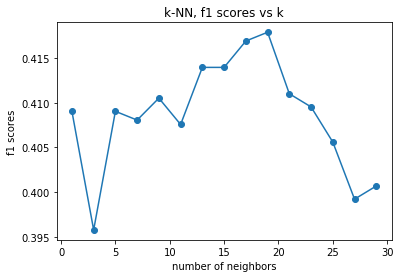

f1 score for MNB with smoothing 1.0 is:
0.7810650887573964
------------------
Best param and f1 score is:
{'alpha': 0.020000000100000002}
0.8289085545722714
------------------


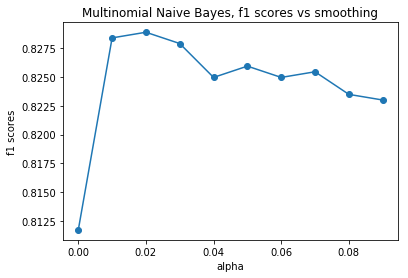

f1 score for Logistic Regression with L2 regulariztion strength 1.0 is:
0.6997041420118343
------------------
Best param and f1 score is:
{'C': 0.20000000010000002}
0.7763028515240905
------------------


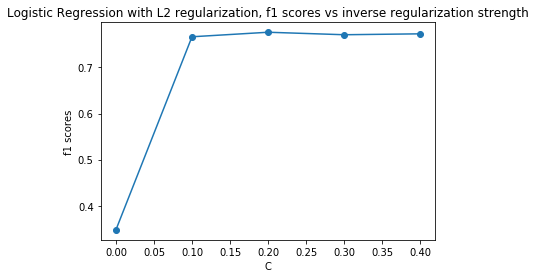

------------------
1e-10
[5.70674183e-13 8.45299474e-13 4.04006981e-13 6.35819484e-13]
0.1000000001
[27.1250283  24.66057313 27.45792701 23.02487585]
0.20000000010000002
[49.74057332 42.74270923 49.32777858 42.6648792 ]
0.30000000010000005
[69.28094753 57.87853223 67.9003255  59.75814281]
0.40000000010000003
[86.74157078 71.15353022 84.29247462 75.05818525]
------------------


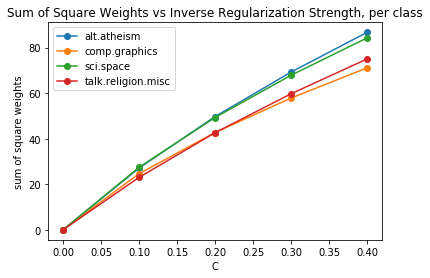

In [356]:
def P3():
    
    def do_knn(train_fv, dev_fv, ks):
        # 5-NN classifier
        clsfr = KNeighborsClassifier(n_neighbors = 5)
        fit = clsfr.fit(train_fv, train_labels)
        preds = clsfr.predict(dev_fv)
        print("f1 score for 5-NN is:")
        print(metrics.f1_score(preds, dev_labels, average = "micro"))

        print("------------------")
        # uses grid search to find best k
        gscv = GridSearchCV(estimator = KNeighborsClassifier()
                            ,param_grid = {"n_neighbors" : ks}
                            ,cv = 3
                            ,scoring = "f1_micro"
                            ,iid = True
                            ,return_train_score = True
                           )
        gscv.fit(train_fv, train_labels)

        # prints best f1 score and k
        print("Best param and f1 score is:")
        print(gscv.best_params_)
        print(gscv.best_score_)

        print("------------------")
        # plots all the f1 scores and ks
        scores = gscv.cv_results_["mean_test_score"]
        plt.plot(ks, scores, marker = "o")
        plt.title("k-NN, f1 scores vs k")
        plt.xlabel("number of neighbors")
        plt.ylabel("f1 scores")
        plt.show()
    
    
    def do_mnb(train_fv, dev_fv, alphas):
        # fit a Multinomial Naive Bayes classifier
        clsfr = MultinomialNB(alpha = 1.0)
        fit = clsfr.fit(train_fv, train_labels)
        preds = clsfr.predict(dev_fv)
        print("f1 score for MNB with smoothing 1.0 is:")
        print(metrics.f1_score(preds, dev_labels, average = "micro"))

        print("------------------")
        # uses grid search to find best alpha
        gscv = GridSearchCV(estimator = MultinomialNB()
                            ,param_grid = {"alpha" : alphas}
                            ,cv = 3
                            ,scoring = "f1_micro"
                            ,iid = True
                            ,return_train_score = True
                           )
        gscv.fit(train_fv, train_labels)

        # prints best f1 score and alpha
        print("Best param and f1 score is:")
        print(gscv.best_params_)
        print(gscv.best_score_)

        print("------------------")
        # plots all the f1 scores and alphas
        scores = gscv.cv_results_["mean_test_score"]
        plt.plot(alphas, scores, marker = "o")
        plt.title("Multinomial Naive Bayes, f1 scores vs smoothing")
        plt.xlabel("alpha")
        plt.ylabel("f1 scores")
        plt.show()
    
    
    def do_lr(train_fv, dev_fv, cs):
        # fit a Logistic Regression classifier
        clsfr = LogisticRegression(penalty="l2"
                                   ,multi_class = "ovr"
                                   ,solver = "liblinear"
                                   ,max_iter = 1000
                                   ,C = 1.0)
        fit = clsfr.fit(train_fv, train_labels)
        preds = clsfr.predict(dev_fv)
        print("f1 score for Logistic Regression with L2 regulariztion strength 1.0 is:")
        print(metrics.f1_score(preds, dev_labels, average = "micro"))
#         print("weight vector for each class at C = 1.0")
#         print(clsfr.coef_.shape)
#         print(clsfr.coef_)
        
        print("------------------")
        # uses grid search to find best C
        gscv = GridSearchCV(estimator = LogisticRegression(penalty="l2"
                                                           ,multi_class = "ovr"
                                                           ,solver = "liblinear"
                                                           ,max_iter = 1000)
                            ,param_grid = {"C" : cs}
                            ,cv = 3
                            ,scoring = "f1_micro"
                            ,iid = True
                            ,return_train_score = True
                           )
        gscv.fit(train_fv, train_labels)
        
        # prints best f1 score and C
        print("Best param and f1 score is:")
        print(gscv.best_params_)
        print(gscv.best_score_)
        
        print("------------------")
        # plots all the f1 scores and C
        scores = gscv.cv_results_["mean_test_score"]
        plt.plot(cs, scores, marker = "o")
        plt.title("Logistic Regression with L2 regularization, f1 scores vs inverse regularization strength")
        plt.xlabel("C")
        plt.ylabel("f1 scores")
        plt.show()
        
        
        
    def do_lr_ec(train_fv, dev_fv, cs):
        # Outputs sum of the squared weight values for each class for each setting of the C parameter
        # we can't use grid search cv because it only allows us access to the best estimator, and not each estimator
        classifiers = map(lambda c: LogisticRegression(penalty="l2"
                                                      ,multi_class = "ovr"
                                                      ,solver = "liblinear"
                                                      ,max_iter = 1000
                                                      ,C = c)
                          , cs)
        fits = map(lambda clsfr: clsfr.fit(train_fv, train_labels), classifiers)
        fits =  list(fits)
        coefs = map(lambda clsfr: clsfr.coef_, fits)
        coefs = list(coefs)
        sqwgts = map(lambda w: np.sum(np.square(w), axis = 1), coefs)
        sqwgts = list(sqwgts)
        
        print("------------------")
        for idx, c in enumerate(cs):
            print(c)
            print(sqwgts[idx])
        
#         print("------------------")
#         for idx, c in enumerate(cs):
#             x = np.arange(len(newsgroups_train.target_names))
#             plt.bar(x, sqwgts[idx], tick_label = newsgroups_train.target_names)
#             plt.title("C = " + str(c))
#             plt.xlabel("class")
#             plt.ylabel("square weights")
#             plt.show()
            
        print("------------------")
        # rearrange data for multi-line plot
        # would be so much easier with pandas ...
        by_c = []
        for idx, _ in enumerate(sqwgts[0]):
            res = []
            for j, w in enumerate(sqwgts):
                res.append(w[idx])
            by_c.append(res)
        
        for idx, y in enumerate(by_c):
            plt.plot(cs, y, marker = "o")
        plt.title("Sum of Square Weights vs Inverse Regularization Strength, per class")
        plt.xlabel("C")
        plt.ylabel("sum of square weights")
        plt.legend(newsgroups_train.target_names)
        plt.show()
    
    
    
    
    # using defautl count vectorizer
    # only fits-and-transforms the train data
    # dev and test data is just transformed
    cv = CountVectorizer()
    train_fv = cv.fit_transform(train_data)
    dev_fv = cv.transform(dev_data)
    print("shape of train feature vector")
    print(train_fv.shape)
    print("shape of dev feature vector")
    print(dev_fv.shape)
    
    print("============================")
    do_knn(train_fv, dev_fv, ks = list(range(1,31,2)))
    
    print("============================")
    do_mnb(train_fv, dev_fv, alphas = np.arange(1.0e-10, 0.1, 0.01))
    
    print("============================")
    do_lr(train_fv, dev_fv, cs = np.arange(1.0e-10, 0.5, 0.1))
    
    print("============================")
    do_lr_ec(train_fv, dev_fv, cs = np.arange(1.0e-10, 0.5, 0.1))
    
P3()

Answers:

a. Why doesn't nearest neighbors work well for this problem?

**Because each word is a feature, many of our records have lots of features, which makes every vector very far away from each other. Also, the features are 0 or 1, and is not modelled well by spherical distance. The high number of neighbors, 19-NN, and relatively low f1 score, suggests the k-nn classifier is overfitting, rather than capturing actual patterns.** 

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

**Logistic regression is trying to calculate the weights for every feature in the vocabulary, for each class, when for the vast majority of documents, relatively few features (words) appear in the document. Multinomial Naive Bayes works better in this case because it does not assume that every word will matter for each class.**

c. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

**C is the inverse of regularization strength. So as C increases, regularization gets weaker. Which means that as C increases, the sum of squared weights values for each class tend to increase, because we are penalizing larger weight coefficients less and less.**


# 4

Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [385]:
def P4():
    
    def lookup_vocab_word(vocab_dict, fet):
        for key, val in vocab_dict.items():
            if val == fet:
                return key
    
    def find_top_features_by_weights(cv, num_features):
        # fits and transforms train data using the given vectorizer
        train_fv = cv.fit_transform(train_data)
        
        # choosing parameters based on output from P3
        clsfr = LogisticRegression(penalty="l2"
                                  ,multi_class = "ovr"
                                  ,solver = "liblinear"
                                  ,max_iter = 1000
                                  ,C = 0.2)
        fit = clsfr.fit(train_fv, train_labels)

        # for every label, gets top n features by weight
        for idx, lbl in enumerate(newsgroups_train.target_names):
            print("------------------")
            print(lbl)
            print("top features by weight coefficients")
            top_features_by_weights = np.argsort(-clsfr.coef_[idx])[:num_features]
            print(top_features_by_weights)
            top_words_by_weights = [lookup_vocab_word(cv.vocabulary_, w) for w in top_features_by_weights]
            print(top_words_by_weights)
            print("top weight coefficients")
            top_weights = sorted(clsfr.coef_[idx], reverse = True)[:num_features]
            print(top_weights)
        
    
    # top n features we want to check
    num_features = 5
    
    print("============================")
    # uses default count vectorizer
    cv = CountVectorizer()
    find_top_features_by_weights(cv, num_features)
    
    
    print("============================")
    # uses bigram count vectorizer
    cv2 = CountVectorizer(ngram_range = (2, 2))
    find_top_features_by_weights(cv2, num_features)
    
P4()

------------------
alt.atheism
top features by weight coefficients
[ 4784  3866 20430  3870 13668]
['bobby', 'atheism', 'religion', 'atheists', 'islam']
top weight coefficients
[0.6193409499731486, 0.6157699036617253, 0.6153596961024825, 0.6063107559389059, 0.5281650098184903]
------------------
comp.graphics
top features by weight coefficients
[11552 12769 10376  1145  6555]
['graphics', 'image', 'file', '3d', 'computer']
top weight coefficients
[1.2555635214760446, 0.8336573564139619, 0.8089116965019939, 0.7103358141516686, 0.6794821245068315]
------------------
sci.space
top features by weight coefficients
[22567 17597 16697 14540 22570]
['space', 'orbit', 'nasa', 'launch', 'spacecraft']
top weight coefficients
[1.5059004208846163, 0.7622789284638474, 0.6641854859764202, 0.6010921443713219, 0.5243712411600706]
------------------
talk.religion.misc
top features by weight coefficients
[ 5901  5904  4743 10234 17609]
['christian', 'christians', 'blood', 'fbi', 'order']
top weight coeff

Answers:

Any surprising features in this table?

**Weights are generally lower in each class. And by looking at the meaning of the words, the highest weighted bigrams appear much less relevant than the highest weighted unigrams. Perhaps this reflects certain two-word phrases tend to be used more often in everyday speech.**

# 5

Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [401]:
def P5b():
    
    def empty_preprocessor(s):
        return s
    
    def better_preprocessor(s):
        s = s.lower()
        
        # replaces any contiguous digits with the digit "8"
        s = re.sub("[0-9]*","8",s)

        # truncates any words to less than a certain length
        s1 = []
        for word in s.split():
            s1.append(word[:8])
        s = " ".join(s1)
        
        return s
    
    def calc_f1(cv):
        
        # fits and transforms train data using the given vectorizer
        # transforms the dev and test data using the given vectorizer
        train_fv = cv.fit_transform(train_data)
        dev_fv = cv.transform(dev_data)
        test_fv = cv.transform(test_data)
        
        # choosing parameters based on output from P3
        clsfr = LogisticRegression(penalty="l2"
                                  ,multi_class = "ovr"
                                  ,solver = "liblinear"
                                  ,max_iter = 1000
                                  ,C = 0.2)
        
        # fits the classifier to train data
        fit = clsfr.fit(train_fv, train_labels)
        
        # calculates vocab size
        fts = cv.get_feature_names()
        num_fts = len(fts)
        
        # predicts and calculates the f1 score against dev data
        preds = clsfr.predict(dev_fv)
        dev_f1 = metrics.f1_score(preds, dev_labels, average = "micro")
        
        # predicts and calculates the f1 score against test data
        preds = clsfr.predict(test_fv)
        test_f1 = metrics.f1_score(preds, test_labels, average = "micro")
        
        return({"vocab_size" : num_fts, "dev_f1" : dev_f1, "test_f1" : test_f1})
    
    
    # uses the empty preprocessor
    print("============================")
    print("empty preprocessor")
    cv = CountVectorizer(preprocessor = empty_preprocessor)
    f1 = calc_f1(cv)
    print(f1)
    
    # uses the better preprocessor
    print("============================")
    print("better preprocessor")
    cv = CountVectorizer(preprocessor = better_preprocessor)
    f1 = calc_f1(cv)
    print(f1)
    
    
P5b()

empty preprocessor
{'vocab_size': 33291, 'dev_f1': 0.7085798816568046, 'test_f1': 0.7119645494830131}
better preprocessor
{'vocab_size': 10717, 'dev_f1': 0.7085798816568046, 'test_f1': 0.7355982274741507}


Answers:

With your new preprocessor, how much did you reduce the size of the dictionary?

**dictionary size was reduced by about 1/3, and test F1 score improved slightly by about 0.02**

# 6

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

+++++++++++++++++++++++
training a logistic classifier using L1, and C =  0.0001


C:\Users\yangyq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yangyq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


size of L1 non zero vocab:  0
training a logistic classifier using L2, with reduced vocabulary, and C =  0.0001
size of L2 non zero vocab:  26879
accuracy:  0.5562130177514792
+++++++++++++++++++++++
training a logistic classifier using L1, and C =  0.001
size of L1 non zero vocab:  2
training a logistic classifier using L2, with reduced vocabulary, and C =  0.001
size of L2 non zero vocab:  26879
accuracy:  0.6375739644970414
+++++++++++++++++++++++
training a logistic classifier using L1, and C =  0.01
size of L1 non zero vocab:  16
training a logistic classifier using L2, with reduced vocabulary, and C =  0.01
size of L2 non zero vocab:  26879
accuracy:  0.6789940828402367
+++++++++++++++++++++++
training a logistic classifier using L1, and C =  0.1
size of L1 non zero vocab:  206
training a logistic classifier using L2, with reduced vocabulary, and C =  0.1
size of L2 non zero vocab:  26879
accuracy:  0.7041420118343196
+++++++++++++++++++++++
training a logistic classifier using L

C:\Users\yangyq\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


size of L1 non zero vocab:  707
training a logistic classifier using L2, with reduced vocabulary, and C =  0.5
size of L2 non zero vocab:  26879
accuracy:  0.7144970414201184
+++++++++++++++++++++++
training a logistic classifier using L1, and C =  1.0
size of L1 non zero vocab:  960
training a logistic classifier using L2, with reduced vocabulary, and C =  1.0
size of L2 non zero vocab:  26879
accuracy:  0.6997041420118343
+++++++++++++++++++++++
training a logistic classifier using L1, and C =  2.0
size of L1 non zero vocab:  1318
training a logistic classifier using L2, with reduced vocabulary, and C =  2.0
size of L2 non zero vocab:  26879
accuracy:  0.6967455621301775
+++++++++++++++++++++++
training a logistic classifier using L1, and C =  10.0
size of L1 non zero vocab:  2289
training a logistic classifier using L2, with reduced vocabulary, and C =  10.0
size of L2 non zero vocab:  26879
accuracy:  0.6893491124260355
[0.5562130177514792, 0.6375739644970414, 0.6789940828402367, 0

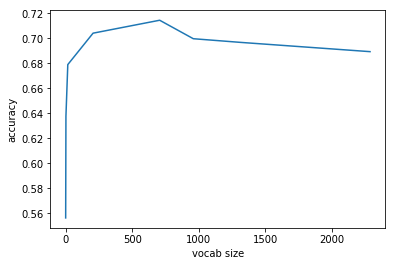

In [70]:
def P6():

    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    def helper_function(c):
        '''for a given c, fits a L1 model, and uses that to generate a reduce vocab. Then uses the reduce vocab to fit an L2 model.'''
        results = {"vocab_size" : 0, "accuracy" : 0}
        print("+++++++++++++++++++++++")
        print("training a logistic classifier using L1, and C = ", c)
        vec = CountVectorizer()
        train_data_features = vec.fit_transform(train_data)
        dev_data_features = vec.transform(dev_data)
        clf = LogisticRegression(penalty="l1", C=c)
        clf.fit(train_data_features, train_labels)

        # for each label, prints the number of non-zero weights
        vocab = vec.get_feature_names()
        non_zero_features = []
        for x in range(0, np.unique(train_labels).size):
            non_zero_features_per_label = np.where(clf.coef_[x] != 0)[0]
            non_zero_features += non_zero_features_per_label.tolist()
        non_zero_features = np.unique(non_zero_features)
        print("size of L1 non zero vocab: ", len(non_zero_features))
        results["vocab_size"] = len(non_zero_features)


        print("training a logistic classifier using L2, with reduced vocabulary, and C = ", c)
        # uses the non-zero weights to build a new vocab
        non_zero_vocab = []
        for x in non_zero_features:
            non_zero_vocab.append(vocab[x])

        # uses new vocab to create a L2 classifier
        vec = CountVectorizer()
        train_data_features = vec.fit_transform(train_data)
        dev_data_features = vec.transform(dev_data)
        clf = LogisticRegression(penalty="l2", C=c)
        clf.fit(train_data_features, train_labels)
        accuracy = clf.score(dev_data_features, dev_labels)
        
        # for each label, prints the number of non-zero weights
        vocab = vec.get_feature_names()
        non_zero_features = []
        for x in range(0, np.unique(train_labels).size):
            non_zero_features_per_label = np.where(clf.coef_[x] != 0)[0]
            non_zero_features += non_zero_features_per_label.tolist()
        non_zero_features = np.unique(non_zero_features)
        print("size of L2 non zero vocab: ", len(non_zero_features))
        print("accuracy: ", accuracy)
        results["accuracy"] = accuracy
        
        return results

    
    accuracy = []
    vocab_size = []
    cs = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    for c in cs:
        results = helper_function(c)
        accuracy.append(results["accuracy"])
        vocab_size.append(results["vocab_size"])
    
    # plots the vocab size vs accuracy
    print(accuracy)
    print(vocab_size)
    p = plt.plot(vocab_size, accuracy)
    plt.xlabel("vocab size")
    plt.ylabel("accuracy")
    plt.show()
        
    ### STUDENT END ###
    
P6()

# 7

Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [71]:
def P7():
    ### STUDENT START ###
    print("======================")
    print("7a trains a logistic classifier using L2, and C 100")
    print("======================")
    vec = TfidfVectorizer()
    train_data_features = vec.fit_transform(train_data)
    dev_data_features = vec.transform(dev_data)
    clf = LogisticRegression(penalty="l2", C=100)
    clf.fit(train_data_features, train_labels)
    vocab = vec.get_feature_names()
    
    # prints the F1 scores
    my_predictions = clf.predict(dev_data_features)
    print(classification_report(my_predictions, dev_labels))
    
    print("======================")
    print("7b shows top 3 documents by ratio of R")
    print("======================")
    
    # note, R = maximum predicted probability / predicted probability of the correct label
    # for each class, gets the max predicted probability
    my_predictions_proba = clf.predict_proba(dev_data_features)
    max_probs = []
    for x in clf.classes_:
        print("class: ", x)
        highest_prediction_doc_for_this_class = np.argsort(my_predictions_proba[:,x])[::-1][:1]
        print("highest probability for this class: ", my_predictions_proba[highest_prediction_doc_for_this_class,x])
        max_probs.append(my_predictions_proba[highest_prediction_doc_for_this_class,x][0])
        #print("document's predictions: ", my_predictions_proba[highest_prediction_doc_for_this_class])

    #print(clf.classes_)
    #print(max_probs)
        
    # for each document prediction, calculates the R ratio
    print("----------------------")
    rs = []
    for x in range(0, len(my_predictions_proba)):
        #print(x, my_predictions_proba[x], dev_labels[x])
        label = dev_labels[x]
        prob = my_predictions_proba[x, label]
        r = prob / max_probs[label]
        rs.append(r)
    
    #print(rs[:10])

    # finds the top 3 documents with the highest Rs
    top_3_rs = np.argsort(rs)[::-1][:3]
    for x in top_3_rs:
        print("post: ")
        print(dev_data[x][:120])
        print("-------------------")
    
    ## STUDENT END ###

P7()

7a trains a logistic classifier using L2, and C 100


C:\Users\yangyq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yangyq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.69      0.65       148
           1       0.91      0.80      0.85       209
           2       0.83      0.83      0.83       199
           3       0.64      0.68      0.66       120

   micro avg       0.76      0.76      0.76       676
   macro avg       0.75      0.75      0.75       676
weighted avg       0.77      0.76      0.77       676

7b shows top 3 documents by ratio of R
class:  0
highest probability for this class:  [0.99624006]
class:  1
highest probability for this class:  [0.99997872]
class:  2
highest probability for this class:  [0.99977406]
class:  3
highest probability for this class:  [0.98799884]
----------------------
post: 


ra>   Robert, you keep making references to "orthodox" belief, and saying
ra> things like "it is held that..." (cf. "K
-------------------
post: 
I replied to this query via e-mail, but I think there are some
issues that are worth discussing in public.



ANSWER:

Unlike the CountVectorizer, the term-frequency-inverse-document-frequency vectorizer normalizes the results to 1. This accounts for features that are quite common in the corpus, and as a result might throw off any term-fequency analysis that a vanilla classifier might perform. One of the mistakes the TFIDF Logistic classifier might be making is that the model doesn't capture the position of the words, or the context and meaning of the phrases.

# 8

EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.